# 1. Shadow of a Box

Consider the constraint optimization problem:
$$\min_{\mathbf{x}\in\mathbb{R}^4} (2\;\;9\;-3\;\;1)\cdot\mathbf{x}$$

$$\text{s.t.}\;-5\leq x_1 \leq 2$$

$$0\leq x_2 \leq 7$$

$$18\leq x_3 \leq 1$$

$$-1\leq x_4 \leq 1$$
(a) Phrase the problem as a problem in standard from.

Since vector based objective functions are not considered in standard form, we need to rewrite the function as scalar based as below:

$$\min_{{x_1,x_2,x_3,x_4}\in\mathbb{R}} F({x_1,x_2,x_3,x_4})= 2x_1 + 9x_2 -3x_3 +4x_4$$ 

$$\text{s.t.}\;x_1 +5 \geq 0$$

$$ 2-x_1 \geq 0 $$

$$ x_2 \geq 0 $$

$$ 7-x_2 \geq 0 $$

$$ x_3 +18 \geq 0 $$

$$ 1 -x_3\geq 0 $$

$$ x_4 +1 \geq 0 $$

$$ 1 -x_4 \geq 0 $$

We also rewrote box constraints to respect the form $g(x_i) \geq 0$

(b) Find a simple and fast algorithm that computes the minimal/maximal value of a linear function with box
constraints.

A suitable algorithm to compute the minimal/maximal value of a linear function with box constraints can be the Simplex algorithm. In SciPy, the linprog function allows choose between different solvers using the method parameter. The 'highs' method, for instance, uses the HiGHS (High-Performance Interior-Point Method for Large-Scale Linear Programming) solver. HiGHS is also suitable for high dimensional settings, but in our case setting the method to 'simplex' is also a feasible choice since dimensionality is low. 

(c) Solve the problem above.

In [1]:
from scipy.optimize import linprog

# coefficients
c = [2, 9, -3, 1]
# constraint bounds
bounds = [(-5, 2), (0, 7), (-18, 1), (-1, 1)]

result = linprog(c,bounds=bounds, method='simplex')
result.x

C:\Users\Annali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Annali\AppData\Local\Temp\ipykernel_18624\3103054449.py:8: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c,bounds=bounds, method='simplex')


array([-5.,  0.,  1., -1.])

# 2 Constraints that Make it Easy

Consider the function $$f(x)= \frac{x^4}{12}-\frac{xcos(8x)}{64}+\frac{sin(8x)}{256}$$

Find the global minimum of $f$ by:

(a) Calculate the first and the second derivative of $f$.

The first derivative of $f$ is

$$f'(x)=\frac{x^3}{3} +\frac{cos(8x)}{64} + \frac{xsin(8x)}{8}$$

The second derivative of $f$ is

$$f''(x)=x (x + cos(8 x))$$
(b) Plot $f$, $f'$,$f''$ for $x\in[-10,10]$. Describe $f$; is it convex? Can you spot a global minimum? Is f convex
near that minimum?

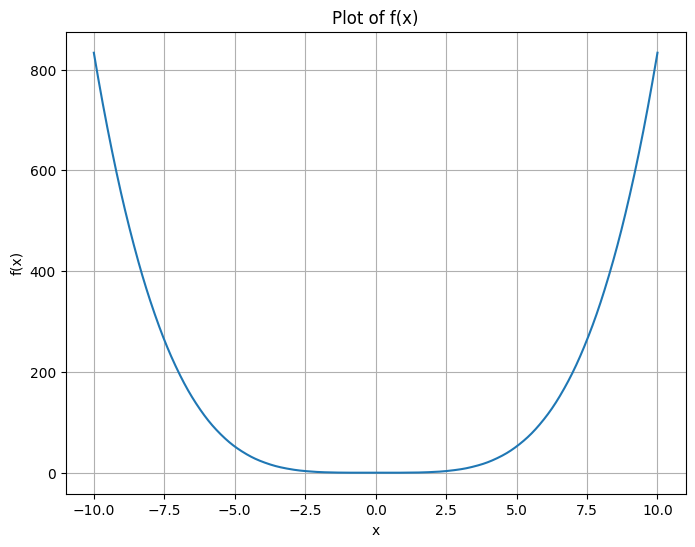

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**4/12 - x*np.cos(8*x)/64 + np.sin(8*x)/256

x_values = np.linspace(-10, 10, 1000)
y_values = f(x_values)

#plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x) = x**4/12 - x*cos(8*x)/64 + sin(8*x)/256')
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

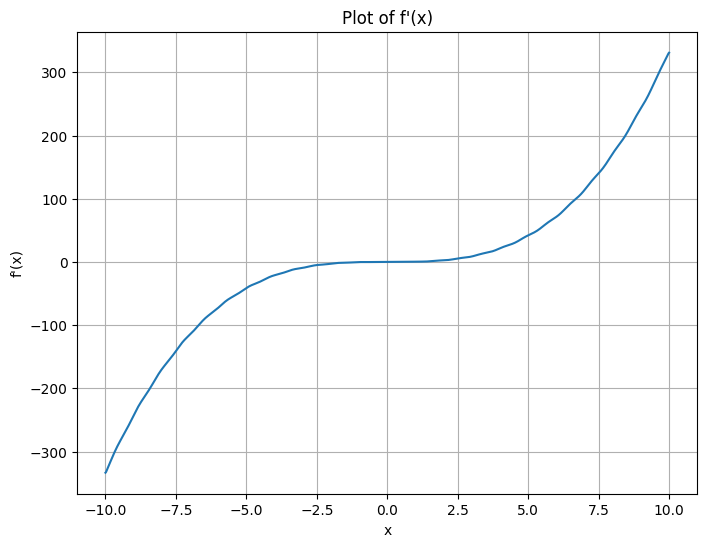

In [3]:
def f_prime(x):
    return np.gradient(f(x), x)

y_prime_values = f_prime(x_values)

# plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_prime_values, label="f'(x)")
plt.title("Plot of f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.show()

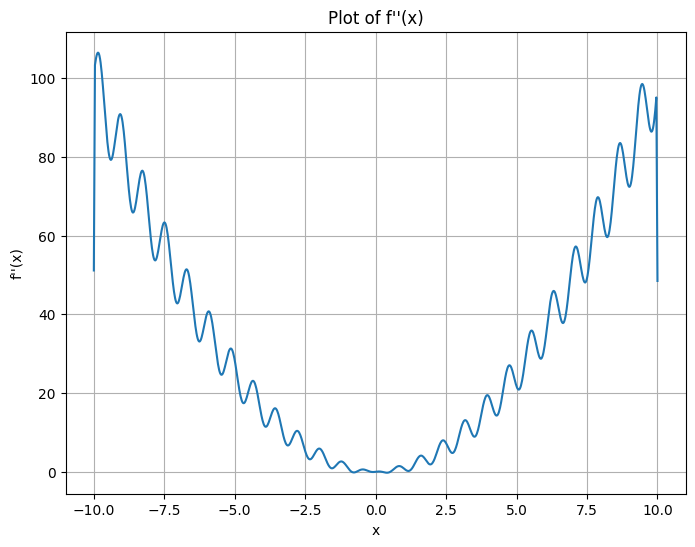

In [4]:
def f_second(x):
    return np.gradient(f_prime(x), x)

y_second_values = f_second(x_values)

# plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_second_values, label="f''(x)")
plt.title("Plot of f''(x)")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.grid(True)
plt.show()

By observing the first plot of the function $f(x)$, it may seem like there is a global minimum in zero in the asked range $[-10,10]$, but the first derivative is not null in zero. To see more clearly the function's behaviour, we decide to restrict the range in $[-1,1]$:

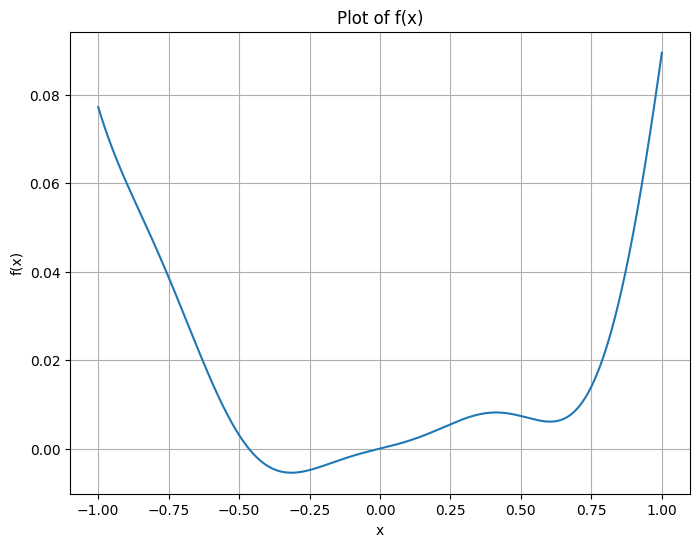

In [5]:
x_values_smaller = np.linspace(-1, 1, 1000)
y_values = f(x_values_smaller)

#plot
plt.figure(figsize=(8, 6))
plt.plot(x_values_smaller, y_values)
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Indeed, we can observe that there is no global minimum $0$, but there is a global minimum in $-0.314$, a local minimum in $0.603$ and a local maximum in $0.441$. 

By definition of convexity, we want the second derivative to be non-negative for all $x$ in the domain. By observing the plot in the asked interval $[-10,10]$, we may think that the function is convex, but it's better to focus on the interval $[-1,1]$ as the behaviour of the function may suggest:

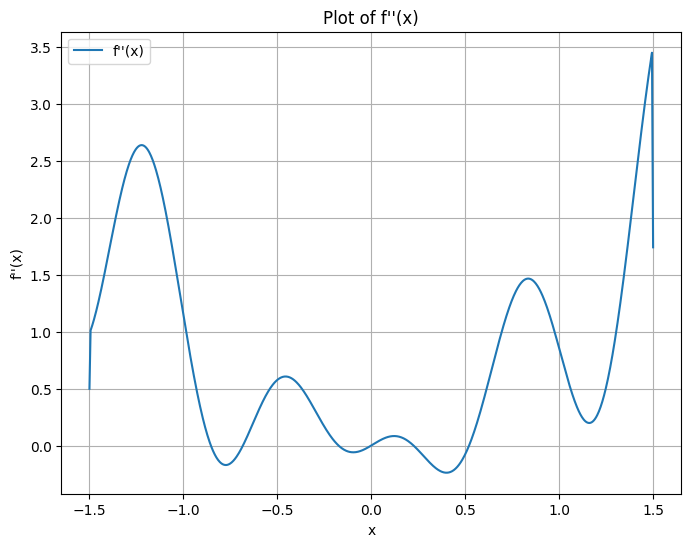

In [6]:
def f_second(x):
    return np.gradient(f_prime(x), x)

x_values_der = np.linspace(-1.5, 1.5, 1000)
y_second_values_der = f_second(x_values_der)

# plot
plt.figure(figsize=(8, 6))
plt.plot(x_values_der, y_second_values_der, label="f''(x)")
plt.title("Plot of f''(x)")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.show()

As we can see, the function has some points in a neighbourhood of the origin under the axis $f(x)=0$, so we can not say that the function is convex. By the way we can say that there exist some intervals close to the origin such that the function is convex.

(c) Find a constraint that turns optimization problem $\min\limits_{x\in\mathbb{R}} f(x)$ into a convex problem with the same global
minimum. Write down the new problem in standard form


If we want to obtain the same global minimum through a convex problem, we have to restrict the interval to be sure that we are looking at the function in an interval where the function is convex, so the convex problem is:

$$\min_{x\in\mathbb{R}}\frac{x^4}{12}-\frac{xcos(8x)}{64}+\frac{sin(8x)}{256}$$

$$s.t.\;\;x + \frac{1}{2}\geq 0$$

$$\;\;\;\;\;\;\;\;\;\;\;-x-\frac{1}{4}\geq 0$$

# 3 Lagrange Dual

Consider the following optimization problem 

$$\max_{\mathbf{x}\in\mathbb{R}^2} \frac{1}{\sqrt{2}}||\mathbf{v}-\mathbf{x}||$$

$$\text{s.t.}\;\; ||\mathbf{x}||=1$$

where $\mathbf{v}\in\mathbb{R}^2$, $\mathbf{v}\neq 0$ is some vector and $||\cdot||$ denotes the euclidean norm.

(a) Explain the geometrical interpretation of the problem – what do you expect regarding a solution?
Simplify the problem so that it has a linear objective, i.e. $\max\limits_{\mathbf{x}\in\mathbb{R}^2}\mathbf{w}^T\mathbf{x}$, s.t ... for some $\mathbf{w}\in\mathbb{R}^2$ and write it in standard form. Does this problem has a global optimum? If yes, is there a global optimum if we remove the constraint, and why?

_Hint_: Certain operations like adding or multiplying with a constant, taking roots or squaring, etc. do not change the solution of an optimization problem (Why?). You can use those to simplify the problem. Also recall that $||\mathbf{a}-\mathbf{b}||^2=||\mathbf{a}||^2-2\mathbf{a}^T\mathbf{b}+||\mathbf{b}||^2$ for any $\mathbf{a},\mathbf{b}\in\mathbb{R}^d$

The geometric sense of the problem says that we are fixin the vector $\mathbf{v}=(v_1,\;v_2)^T\in\mathbb{R}^2$ in the plane and we are trying to maximize the distance from it to a unit legth vector $\mathbf{x}=(x_1,\;x_2)^T\in\mathbb{R}^2$ times the scalar factor $\frac{1}{\sqrt{2}}$. In such a way we can rewrite the probelm as 

$$\max_{x_1,x_2\in\mathbb{R}} \frac{1}{\sqrt{2}}\sqrt{(v_1-x_1)^2+(v_2-x_2)^2}$$

$$\text{s.t.}\;\; \sqrt{x_2^2+x_2^2}=1$$

But in such a way we can easily see from the constraint that the solutions $\mathbf{x}$ must belong to the following red circumference 

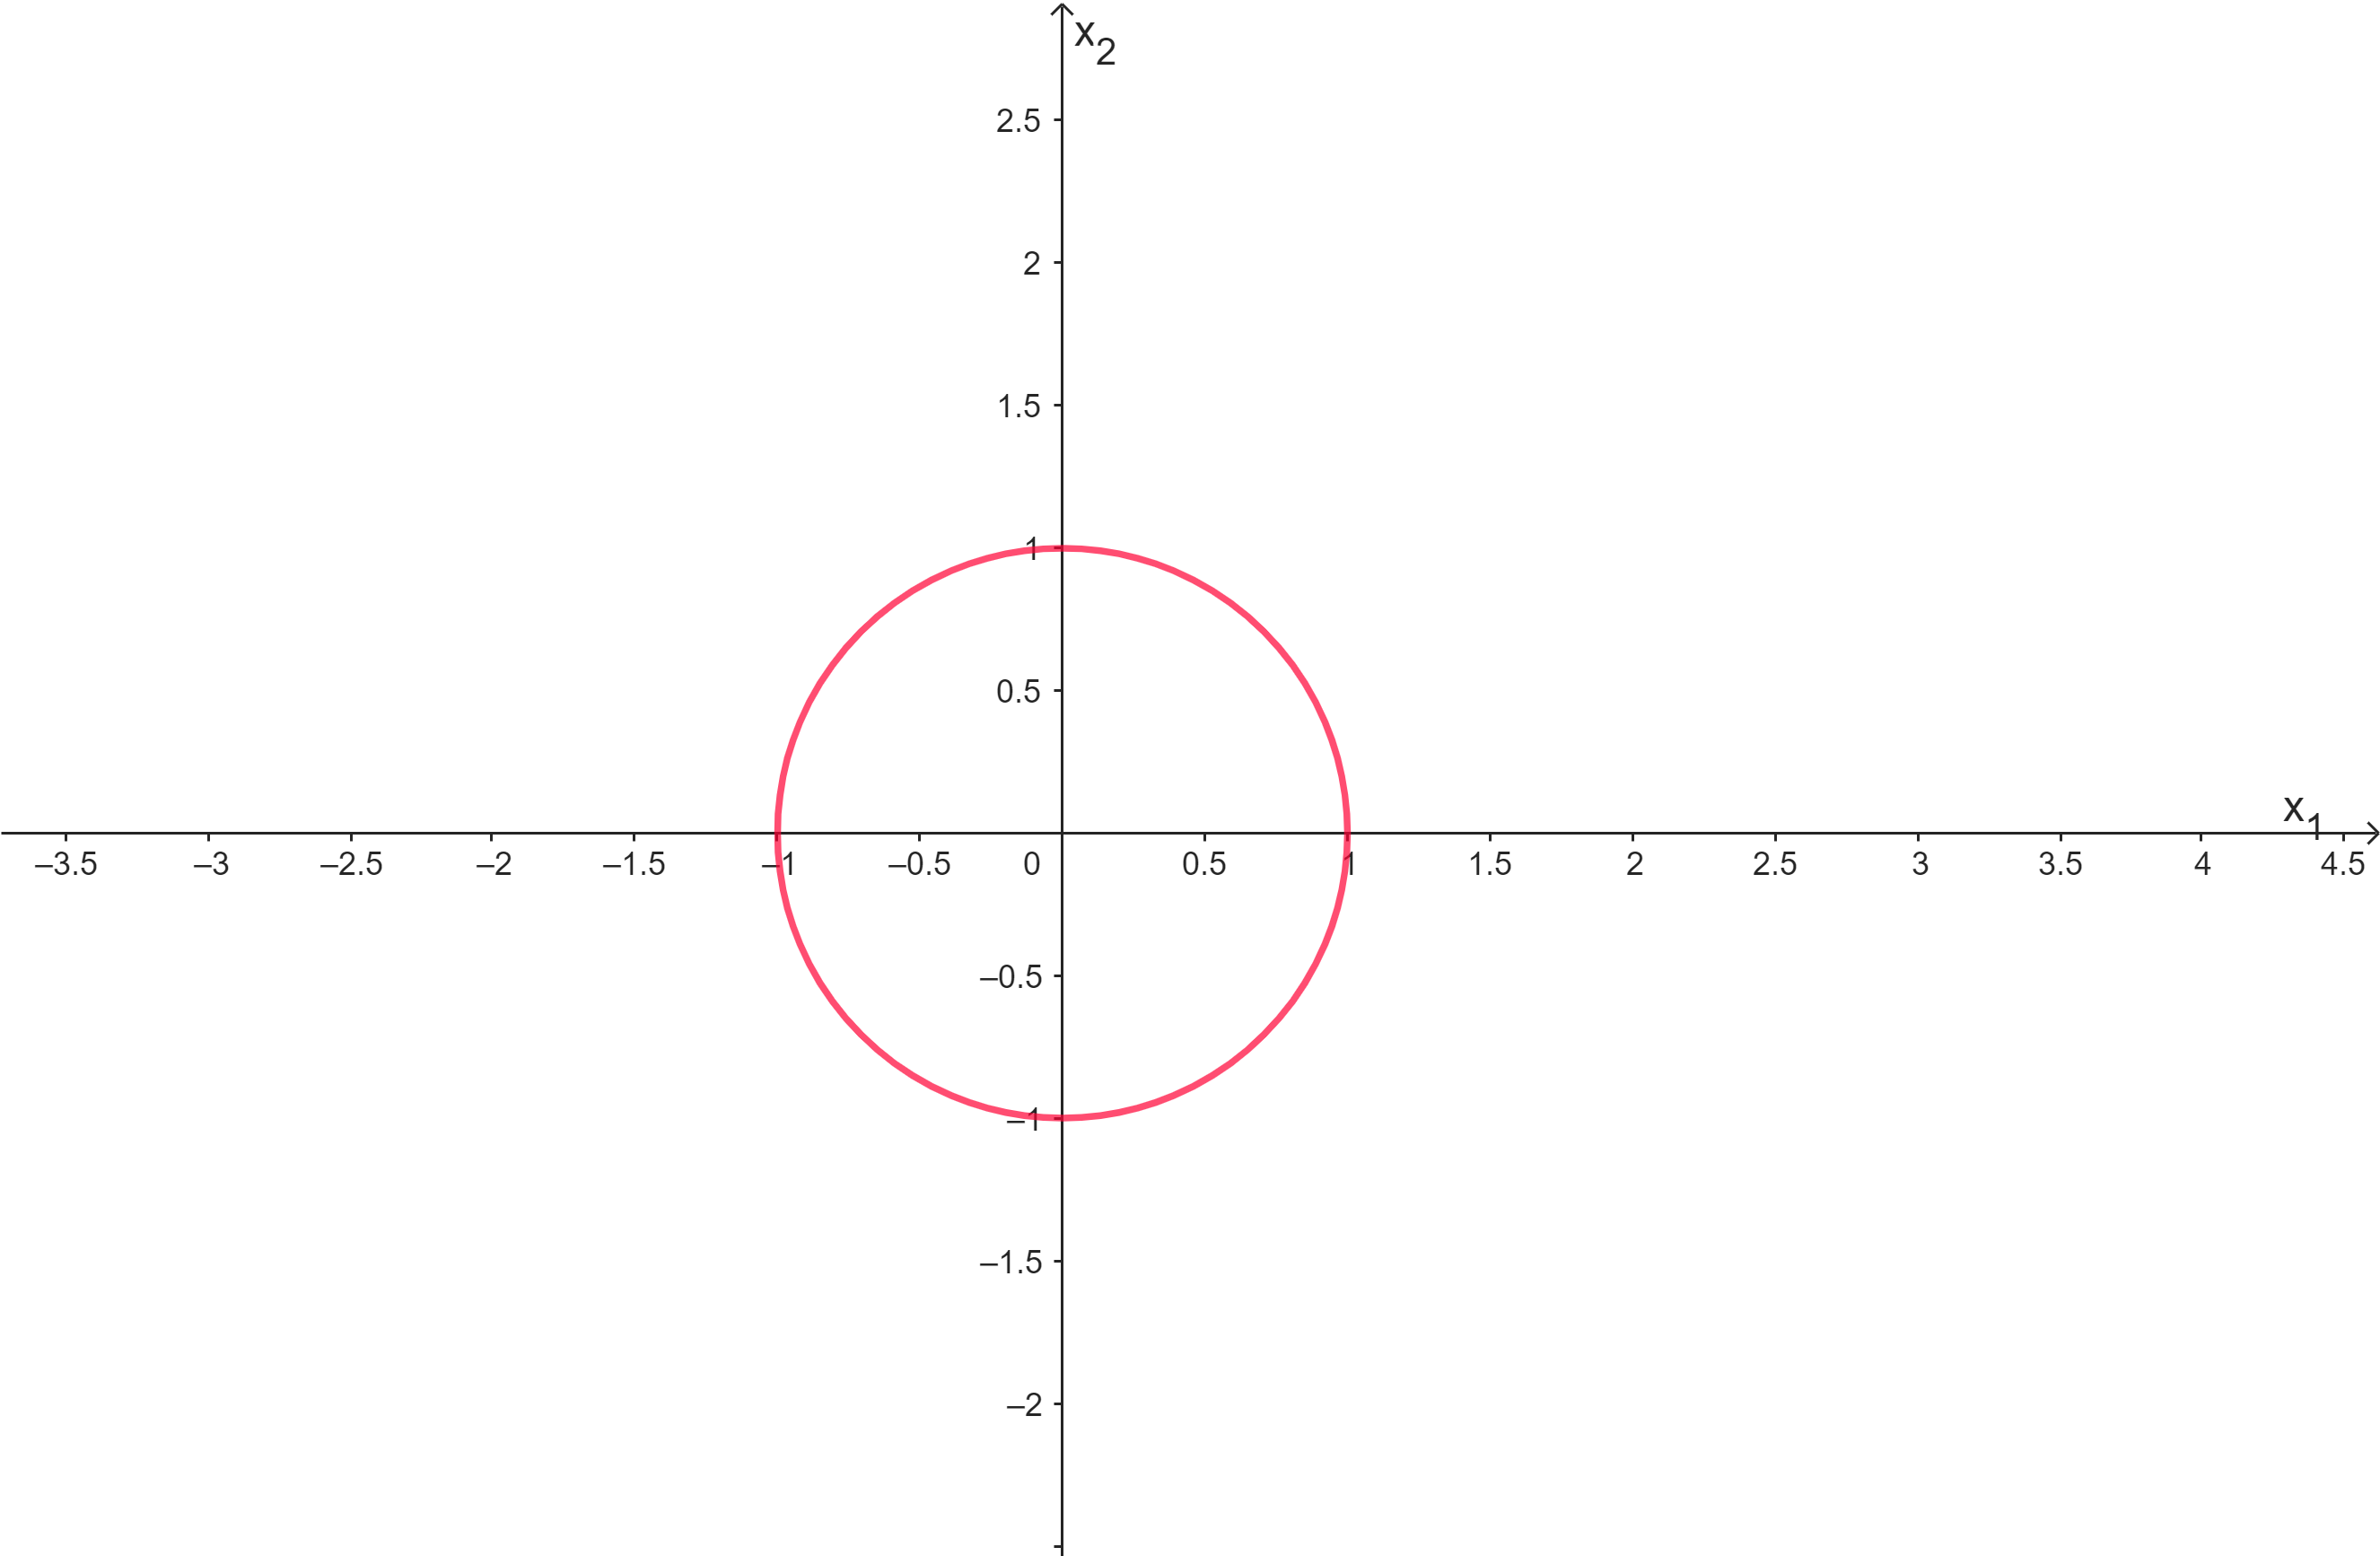

If we have $||\vec{v}||>||\vec{x}||$, the solution is the intersection of $-\vec{v}$ with the red circumference times the scalar factor $\frac{1}{\sqrt{2}}$.

If we have $||\vec{v}||<||\vec{x}||$, the solution is obtained by taking the projection of $-\vec{v}$ on the circumference times the scalar factor $\frac{1}{\sqrt{2}}$.

If we have $||\vec{v}||=||\vec{x}||$, the vector $\vec{v}$ already lays on the circumference, so the result is obviously zero.

If we write call the optimization function $f(x_1,x_2)=\frac{1}{\sqrt{2}}\sqrt{(v_1-x_1)^2+(v_2-x_2)^2}$ we have that the solutions $\tilde{x}_1$ and $\tilde{x}_2$ maximize the function in $f(\tilde{x}_1,\tilde{x}_2)=|\frac{1}{\sqrt{2}}(||V||-1)|=|\frac{1}{\sqrt{2}}(\sqrt{v_1^2+v_2^2}-1)|$

Since certain operations like adding or multiplying with a constant, taking roots or squaring, etc. do not change the solution of an optimization problem, we can re-write the problem 

$$\max_{\mathbf{x}\in\mathbb{R}^2}\frac{1}{\sqrt{2}}||\mathbf{v}-\mathbf{x}||$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$ 

as

$$\max_{\mathbf{x}\in\mathbb{R}^2}||\mathbf{v}-\mathbf{x}||$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$ 

But by definition of norms we obtain:

$$\max_{\mathbf{x}\in\mathbb{R}^2}\;<\mathbf{v}-\mathbf{x},\mathbf{v}-\mathbf{x}>$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$

Since this is equivalent to the problem 

$$\max_{\mathbf{x}\in\mathbb{R}^2}\;(\mathbf{v}-\mathbf{x})^T\cdot(\mathbf{v}-\mathbf{x})$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$

By properties of vector products we can write it as

$$\max_{\mathbf{x}\in\mathbb{R}^2}\mathbf{v}^T\mathbf{v}-2\mathbf{v}^T\mathbf{x}+\mathbf{x}^T\mathbf{x}$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$

which is equivalent to

$$\max_{\mathbf{x}\in\mathbb{R}^2}||\mathbf{v}||^2-2\mathbf{v}^T\mathbf{x}+||\mathbf{x}||^2$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$


Since the norm of $\mathbf{x}$ is one we have that the last problem is equivalent to

$$\max_{\mathbf{x}\in\mathbb{R}^2}||\mathbf{v}||^2-2\mathbf{v}^T\mathbf{x}+1=v_1^2+v_2^2-2(v_1x_1+v_2x_2)+1$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$

If we define the vector $\mathbf{w}$ as 
$$\mathbf{w}=\begin{bmatrix} \frac{v_1^2}{x_1}+2v_1+\frac{1}{x_1} \\\ \frac{v_2^2}{x_2}+2v_2+\frac{1}{x_2}  \end{bmatrix}$$

We can write the last problem as 

$$\max_{\mathbf{x}\in\mathbb{R}^2}\mathbf{w}^T\mathbf{x}$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$

Or if we want it in standard form as

$$\min_{\mathbf{x}\in\mathbb{R}^2}-\mathbf{w}^T\mathbf{x}$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$

and equivalentely

$$\min_{\mathbf{x}\in\mathbb{R}^2}\mathbf{v}^T\mathbf{x}-||\mathbf{v}||^2-1$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$

Since the previous problem only has an minimum and a maximum and the values can only belong to this range, also this last problem behaves the same since they are equivalent. They share the same solution (the argmax is the same), but the objective function provides a different maximum even if the problems are equivalent. 

If we remove the constraint for the problem 

$$\max_{\mathbf{x}\in\mathbb{R}^2}\frac{1}{\sqrt{2}}||\mathbf{v}-\mathbf{x}||$$

$$\text{s.t.}\; ||\mathbf{x}||=1$$ 

We have no more a global optimum, because now we are restricted only to the values that lay on the red circumference above centered in the origin of radius $1$, if we take whatever vector $\mathbf{x}$ in the $\mathbb{R}^2$-plane the function keeps increasing so there's no maximum, on the other hand we have a global minimum for $\mathbf{v}=\mathbf{x}$ since the distance between those vectors is null.

## Tutor solution:

$$\min_{\mathbf{x}\in\mathbb{R}^2}-||\mathbf{v}||^2+2\mathbf{v}^T\mathbf{x}- ||\mathbf{x}||^2$$

$$\text{s.t.}\; ||\mathbf{x}||-1=0$$ 

$$\min_{\mathbf{x}\in\mathbb{R}^2}2\mathbf{v}^T\mathbf{x}$$

$$\text{s.t.}\; ||\mathbf{x}||-1=0$$ 

$$\min_{\mathbf{x}\in\mathbb{R}^2}\mathbf{v}^T\mathbf{x}$$

$$\text{s.t.}\; ||\mathbf{x}||-1=0$$ 

(b) Calculate the Lagrange-dual of the simplified problem. Find the analytic solution to the inner minimization problem. Write down the Lagrange dual as a problem in standard form and solve the problem. Does the solution match the geometrical expectation?


To calculate the Lagrange dual first we write the problem's Lagrangian:

$$\mathcal{L}(\lambda,x_1,x_2)=2(v_1x_1+v_2x_2)-v_1^2-v_2^2-1-\lambda(x_1^2+x_2^2-1)$$

We write its derivatives with respect to $x_1$ and $x_2$:

$$\frac{\partial\mathcal{L}(\lambda,x_1,x_2)}{\partial x_1}=2v_1-2\lambda x_1$$

$$\frac{\partial\mathcal{L}(\lambda,x_1,x_2)}{\partial x_2}=2v_2-2\lambda x_2$$

By putting them equal to zero, we re-write $x_1$ and $x_2$ in terms of $\lambda$:

$$x_1=\frac{v_1}{\lambda},\;\;\;\;x_2=\frac{v_2}{\lambda}$$

We substitute it into the objective function to obtain a function depending just on $\lambda$:

$$\varphi(\lambda)=2\left(\frac{v_1^2}{\lambda}+\frac{v_2^2}{\lambda}\right)-v_1^2-v_2^2-1-\lambda\left(\frac{v_1+v_2}{\lambda}-1\right)$$

that we can write better as

$$\varphi(\lambda)=\left(\frac{2}{\lambda}-1\right)(v_1^2+v_2^2)-(v_1+v_2)+\lambda-1$$

So the Lagrange-dual of the simplified problem is

$$\sup_{\lambda\geq 0} \left(\frac{2}{\lambda}-1\right)(v_1^2+v_2^2)-(v_1+v_2)+\lambda-1$$

The inner minimization problem 

$$\inf_{x_1,x_2} 2(v_1x_1+v_2x_2)-v_1^2-v_2^2-1-\lambda(x_1^2+x_2^2-1)$$

has minimum

$$\mathbf{x}=\frac{1}{\lambda}\mathbf{v}$$

The Lagrange dual in standard form is

$$\sup_{\lambda\geq 0} \left(\frac{2}{\lambda}-1\right)(v_1^2+v_2^2)-(v_1+v_2)+\lambda-1$$


To solve the problem we first derive the function $\varphi(\lambda)$ with respect to $\lambda$ and we put it equal to zero to find the max:

$$-\frac{2}{\lambda^2}(v_1^2+v_2^2)+1=0$$

and we obtain the solution $\lambda=2(v_1^2+v_2^2)=2||\mathbf{v}||^2$. So the optima is 

$$\mathbf{x}=\frac{1}{2}\frac{\mathbf{v}}{||v||}$$

Probably we did wrong some computations, because we obtain the correct result if we had obtained 

$$-\frac{v}{||v||}$$

because the result is geometrically the coordinates of half the projection of $\mathbf{v}$ on the circumference, so it has no geometrical meaning in the sense of finding the maximal distance from a generic vector $\mathbf{v}$ to the circumference centered in the origin of radius $1$.

(c) Consider the map $\phi:\mathbb{R}\rightarrow\mathbb{R}^2,\;t\mapsto(sin(t),\;cos(t))^T$. Why is the initial problem equivalent to $$\max_{t\in\mathbb{R}^2}\frac{1}{\sqrt{2}}||\mathbf{v}-\phi(t)||\text{?}$$ Why can we drop the constraints? How to turn a solution to the new problem into a solution to the original one.

In the following we will refer to this as the _parametrization_ approach.

The map $\phi:\mathbb{R}\rightarrow\mathbb{R}^2,\;t\mapsto(sin(t),\;cos(t))^T$ is the equation of a circumference centered in the origin of radius $1$, so if we substitute $\mathbf{x}$ by the function $\phi(t)$ we can also remove the the constraint, because it's already in the optimization function.

(d) Implement and visualize the problem and both approaches (Lagrange-dual and parametrization) using gradient descent for $\mathbf{v}=(5,\;7)^T$: Plot the function as a heat map and mark the feasible set. Implement the Lagrange-dual and parametrization using gradient descent and plot the respective paths on the heat map as well as the obtained values for each step in a second plot. What do you observe?

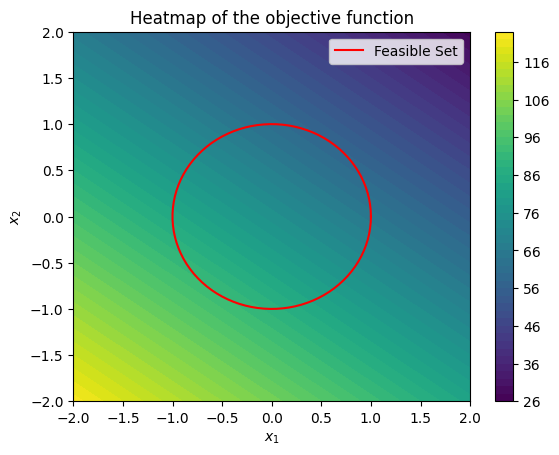

In [7]:
def objective_function(x, v):
    return np.linalg.norm(v)**2 - 2 * np.dot(v, x) + 1

x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range) 
Z = np.zeros_like(X)  
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = objective_function(np.array([X[i, j], Y[i, j]]), [5, 7]) 
plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar()
plt.title('Heatmap of the objective function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'r', label='Feasible Set')
plt.legend()
plt.show()

# 4 Modeling

Imagine the following: You own a house. Since it is very dark in the attic, you decide to put a rectangular window in the gable wall, which has
the shape of an isosceles triangle with width w, height h. Because of the eaves, a shadow falls on the wall, which reduces the light intensity on average approximately linearly from $100\%$ to $0\%$ towards the top of the gable with a factor $d$ (see Figure 1. $d$ is a property of your house, you can consider it as a parameter of the optimization problem). The price you have to pay for the window is given by its area (up to a constant $p$). Assuming you want to pay at most a fixed value $C$ for the window, what are the best possible coordinates for the corners of the window if you want to get as much light inside as possible?

(a)  Formalize the problem described above. Explain your choices! What do you expect as a reasonable solution? And why?

For our problem we choose to maximize tha area of the window we want to put in the gable wall.In particular we seek for the biggest wind0w possible that fits in the light triangle portion of the gable wall. Indeed, in our optimization problem we have the folowing variables:

- $w_g,\;h_g\in\mathbb{R}_{+}$ which are respectively the width and the height of the gable wall;

- $w_w,\;h_w\in\mathbb{R}_{+}$ which are respectively the width and the height of the window;

- $d\in\mathbb{R}_{+}$ which is the area of the shadow produced by the eaves. We made a little modification here, considering d as the actual area of the shadow and not as a factor. This also implies that d cannot be negative;

- $C\in\mathbb{R}_{+}$ which is the maximum price we want to pay for the window;


- $p\in\mathbb{R}_{+}$ which is the costant that multiplied by the area of the window returns the actual price of the window. Also $p$ cannot be negative otherwise we'll have a negative price. 

In such a way we can write our target function as $\max\limits_{h_w,h_w\in\mathbb{R}_{+}} h_w\cdot h_w$ and as constraint we want to explain:

- the fact that we have a maximum price $C$ we can spend for the window, so that the price of the window $p(h_w\cdot h_w)$ is less or equal than $C$;

- the height of the window must be less or equal than the height of the gable hall;

- the base of the window must be less or equal than the width of the gable hall;

- the area of the optimal window must be less or equal to half of the light triangle. This come from the fact that the maximum area of a rectangle inscribed in an isosceles triangle is exactly half of the triangle's area.  

Since we have few parameters, this opens to different scenarios. We may have a very big $d$ leading, of course, to a small optimal window given that it's useless to have a window embedded in darkness, even if we have an enormous budget.
Speaking about the budget, we may also have no shadow at all, but if the budget is unsufficient well'just make the window according to our financial resources.

(b) Turn your formalization into an optimization problem in standard from.

As we defined our optimization problem, the result is the following:

$$\min_{h_w,h_w\in\mathbb{R}_{+}} -w_w\cdot h_w$$
$$\text{s.t.}\;\left(\frac{w_g\cdot h_g}{2}-d\right) - w_w\cdot h_w \geq 0 $$
$$C-p(h_w\cdot h_w)\geq 0 $$
$$h_g-h_w\geq 0$$
$$w_g-w_w\geq 0$$

(c) Implement your approach: Write a Python-script that, given the parameters $w,\;h,\;d,\;p$, and $C$, randomly generates a starting point and optimizes your function using one of the algorithms from the lecture. Plot your results, i.e., gable wall with window.

In [12]:
from scipy.optimize import minimize

def light(measures):
    h_w, w_w = measures
    return -(h_w * w_w)

def constraint1(measures, C, p):
    h_w, w_w = measures
    price = h_w * w_w * p
    return C - price

def constraint2(measures, h, w, d):
    h_w, w_w = measures
    area_w = h_w * w_w
    area_t = (h * w) / 2
    ideal_area_w = (area_t - d) / 2
    return ideal_area_w - area_w




def get_best_window():

    w=np.random.randint(1,100) 
    h=np.random.randint(w/2,w*2)   
    d=np.random.randint(1,(h*w)/2)
    
    light_triangleArea = (h*w/2)-d
    k=np.sqrt(light_triangleArea/(h*w/2)) # scaling factor. Our light triangle is just a scaled version of the wall. 
    
    C=np.random.randint(light_triangleArea/2,(h*w)/2)
    
    p=1


    bounds=[(0,k*h),(0,k*w)] # bounds for the window
    
    # Generate random initial values for h_w and w_w
    initial_values = np.random.rand(2) * [h,w]    
    constraints = (
        {'type': 'ineq', 'fun': constraint1, 'args': (C, p)},
        {'type': 'ineq', 'fun': constraint2, 'args': (h, w, d)}
    )

    
    
    result = minimize(light, initial_values, bounds=bounds,constraints=constraints)


    optimal_measures = result.x
    optimal_area = -result.fun  # Negate to get the actual area

    print("Optimal Measures:", optimal_measures) 
    print("Optimal Area:", optimal_area) 
    final_result={'h_w':optimal_measures[0],
                  'w_w':optimal_measures[1],
                  'h':h,
                  'w':w,
                  'd':d,
                  'C':C,
                  'k':k,
                  'window_area':optimal_area
                  }
    
    opt_w=optimal_measures[1] 
    opt_h=optimal_measures[0]
    

    lt_w = k*w 
    lt_h = k*h

    fig, ax = plt.subplots()

    # Plot the wall 
    wall_vertices = np.array([[0, 0], [w, 0], [w/2, h]])

    wall= plt.Polygon(wall_vertices, fill=True, edgecolor='red', facecolor='lightgrey')
    ax.add_patch(wall)

    # Plot the light triangle
    lt_vertices =  np.array([[(w/2)-(lt_w/2), 0], [(w/2)+(lt_w/2), 0], [w/2, lt_h]])
    lt= plt.Polygon(lt_vertices, fill=True, edgecolor=None, facecolor='white')
    ax.add_patch(lt)

    # Plot the optimal window 
    window_vertices = np.array([[w/2-(opt_w/2),0], [(w/2+(opt_w/2)), 0], [(w/2+(opt_w/2)), opt_h], [w/2-(opt_w/2), opt_h]])
    window_polygon = plt.Polygon(window_vertices, fill=None, edgecolor='black')
    ax.add_patch(window_polygon)

    # plot the lines
    line_x1 = [w/2-(opt_w/2),w/2+(opt_w/2)]
    line_y1 = [opt_h/2,opt_h/2]
    line_x2 = [w/2 , w/2]
    line_y2 = [0,opt_h]

    plt.plot(line_x1, line_y1, color='black', linewidth=1)
    plt.plot(line_x2, line_y2, color='black', linewidth=1)

    # color the background
    ax.set_facecolor('lightblue')

    ax.set_xlim([0, w])
    ax.set_ylim([0, h])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('Width')
    plt.ylabel('Height')


    plt.show()
    
    return final_result

Optimal Measures: [51.09794516  7.29970645]
Optimal Area: 372.9999999424617


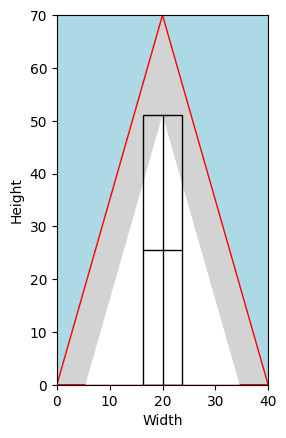

{'h_w': 51.097945164120915,
 'w_w': 7.299706450903793,
 'h': 70,
 'w': 40,
 'd': 654,
 'C': 833,
 'k': 0.7299706452023552,
 'window_area': 372.9999999424617}

In [13]:
get_best_window()

(d) Discuss your results. Do you obtain a good solutions? Can you do better by hand? Is the found solution what you  expected
(compare to part (a))? Also discuss all assumptions made.

Everything we said in point a) was true, everything depends on the initial parameter setting. We also assumed the window can be moved and so it doesn't have to centered in the wall. We also thought that keeping the window centered but as low as possible was the best location and this helped us in finding decent window sizes even when the shadow was significant. Now, we acknowledge that this may be a strong assumption in the real world, since will ruin the architecture's harmony and practicality (maybe it's too low and so having a window at pavement's level is useless) but made sense in the optimization problem.\
Given that, we also changed a bit the output of the problem, so we're not returning the actual coordinates but the dimensions of the windows. This choice was coming from the fact that the coordinates are relative to where we want to position the window. Once this is decided, the coordinates are easily retrived. In the plot code they are represented by the `window_vertices` variable. 
Most of the time we obtained meaningful solutions, respecting all the assumptions and constrained we posed. In few cases we do not obtain an optimal solution since the window invades a bit the shadow zone. Maybe the constraints are not always sufficient to keep the window in the light triangle and they need some further improvement.\
We also decided to randomize the setting, but in a meaningful way:
- First se $w$
- Set $h \in [w/2,w*2]$ to avoid creating very unbalanced settings
- Set $d$ such that cannot be more than the wall area
- Set $C$ not too small to avoid always having a small window, but not too big for not having a dispoportionate budget
- $p$ was left to 1 for simplicity

Another noteworthy detail is that for a certain setting we can obtain multiple solutions, so thinner and higher windows or sorter and wider ones. 

Since the problem has low dimensionality, it could be easily handled by hand. The high number of constraints makes it a bit tricky to manage but still doable. 